In [13]:
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum")  # Or other appropriate channel

backend_name ='ibm_brisbane'
backend = service.backend(backend_name)

import numpy as np

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Plotting routines
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from qiskit_aer import Aer
from qiskit.compiler import transpile


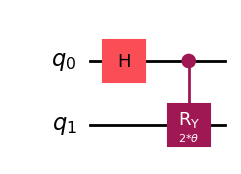

In [14]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService
#backend = least_busy()
service = QiskitRuntimeService(channel = 'ibm_quantum',token='fa6c1fd6e1d33ed21b09389e84015f16788b8ee7de800ce4a5a1f8b9c934b9cc0f145a64f9926598c14a798763f1eb58e389d6a1cfa6f143a2f8dc8271b7faa2') #Put your own token here!
theta = Parameter("$\\theta$")
qc = QuantumCircuit(2)
qc.h(0)  #Create a h gate on the 0 quibit
#qc.cx(0, 1)  #Create a CNOT gate on 0 and 1
#qc.ry(theta, 0)
qc.cry(2 * theta, 0, 1)
qc.draw(output = 'mpl')

In [15]:
#backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
#backend.name #We used ibm_brisbane

In [16]:
number_of_phases = 41
phases = np.linspace(0, 4 * np.pi, number_of_phases)
# Phases need to be expressed as list of lists in order to work
individual_phases = [[ph] for ph in phases]
print (phases)

[ 0.          0.31415927  0.62831853  0.9424778   1.25663706  1.57079633
  1.88495559  2.19911486  2.51327412  2.82743339  3.14159265  3.45575192
  3.76991118  4.08407045  4.39822972  4.71238898  5.02654825  5.34070751
  5.65486678  5.96902604  6.28318531  6.59734457  6.91150384  7.2256631
  7.53982237  7.85398163  8.1681409   8.48230016  8.79645943  9.1106187
  9.42477796  9.73893723 10.05309649 10.36725576 10.68141502 10.99557429
 11.30973355 11.62389282 11.93805208 12.25221135 12.56637061]


In [17]:


# <CHSH1> = <AB> - <Ab> + <aB> + <ab> -> <ZZ> - <ZX> + <XZ> + <XX>
observable1 = SparsePauliOp.from_list([("ZZ", 1), ("ZX", -1), ("XZ", 1), ("XX", 1)])

# <CHSH2> = <AB> + <Ab> - <aB> + <ab> -> <ZZ> + <ZX> - <XZ> + <XX>
observable2 = SparsePauliOp.from_list([("ZZ", 1), ("ZX", 1), ("XZ", -1), ("XX", 1)])

from qiskit_aer import AerSimulator

simulator = AerSimulator()

# To run on a local simulator:
# Use the StatevectorEstimator from qiskit.primitives instead.



chsh_isa_circuit = transpile(qc, backend=simulator, optimization_level=3)
chsh_isa_circuit.draw(output="mpl", idle_wires=False, style="iqp")


isa_observable1 = observable1.apply_layout(layout=chsh_isa_circuit.layout)
isa_observable2 = observable2.apply_layout(layout=chsh_isa_circuit.layout)


Obv1_ZZ=(isa_observable1[0])
Obv1_ZX=(isa_observable1[1])
Obv1_XZ=(isa_observable1[2])
Obv1_XX=(isa_observable1[3])

Obv2_ZZ=(isa_observable2[0])
Obv2_ZX=(isa_observable2[1])
Obv2_XZ=(isa_observable2[2])
#print(isa_observable2[2])
Obv2_XX=(isa_observable2[3])




In [18]:
from qiskit.primitives import StatevectorEstimator
estimator = StatevectorEstimator()

job_1 = estimator.run([(chsh_isa_circuit, [[Obv1_ZZ], [Obv1_ZX], [Obv1_XZ], [Obv1_XX], [Obv2_ZX], [Obv2_XZ]], phases)]).result()

#estimator = Estimator(mode=backend)

#pub = (
   # chsh_isa_circuit,  # ISA circuit
   # [[Obv1_ZZ], [Obv1_ZX], [Obv1_XZ], [Obv1_XX], [Obv2_ZX], [Obv2_XZ]],  # ISA Observables
   # phases,  # Parameter values
#)

#job_1 = estimator.run(pubs=[pub]).result()





In [19]:
#from qiskit_ibm_runtime import QiskitRuntimeService

#job = service.job('cy1vmg29b62g008h7f6g')
#result_1 = job.result()

# Check the status
#print(result_1)

In [20]:

#ab = result_1[0].data.evs[0]
#minus_aB = result_1[0].data.evs[1] #Mayus stand for prime
#Ab = result_1[0].data.evs[2]
#AB = result_1[0].data.evs[3]

#aB = result_1[0].data.evs[4]
#minus_Ab = result_1[0].data.evs[5]
ab = job_1[0].data.evs[0]
minus_aB = job_1[0].data.evs[1] #Mayus stand for prime
Ab = job_1[0].data.evs[2]
AB = job_1[0].data.evs[3]

aB = job_1[0].data.evs[4]
minus_Ab = job_1[0].data.evs[5]
print('AB:', ab)
print("-A B':", minus_aB)
print("A' B:", Ab)
print("A' B':", AB)
print("A B':", aB)
print("-A' B:", minus_Ab)

S_1= ab+minus_aB+Ab+AB

S_2= ab+aB+minus_Ab+AB



AB: [0.        0.0954915 0.3454915 0.6545085 0.9045085 1.        0.9045085
 0.6545085 0.3454915 0.0954915 0.        0.0954915 0.3454915 0.6545085
 0.9045085 1.        0.9045085 0.6545085 0.3454915 0.0954915 0.
 0.0954915 0.3454915 0.6545085 0.9045085 1.        0.9045085 0.6545085
 0.3454915 0.0954915 0.        0.0954915 0.3454915 0.6545085 0.9045085
 1.        0.9045085 0.6545085 0.3454915 0.0954915 0.       ]
-A B': [-1.00000000e+00 -9.51056516e-01 -8.09016994e-01 -5.87785252e-01
 -3.09016994e-01 -6.12323400e-17  3.09016994e-01  5.87785252e-01
  8.09016994e-01  9.51056516e-01  1.00000000e+00  9.51056516e-01
  8.09016994e-01  5.87785252e-01  3.09016994e-01  1.83697020e-16
 -3.09016994e-01 -5.87785252e-01 -8.09016994e-01 -9.51056516e-01
 -1.00000000e+00 -9.51056516e-01 -8.09016994e-01 -5.87785252e-01
 -3.09016994e-01 -3.06161700e-16  3.09016994e-01  5.87785252e-01
  8.09016994e-01  9.51056516e-01  1.00000000e+00  9.51056516e-01
  8.09016994e-01  5.87785252e-01  3.09016994e-01  4.2862638

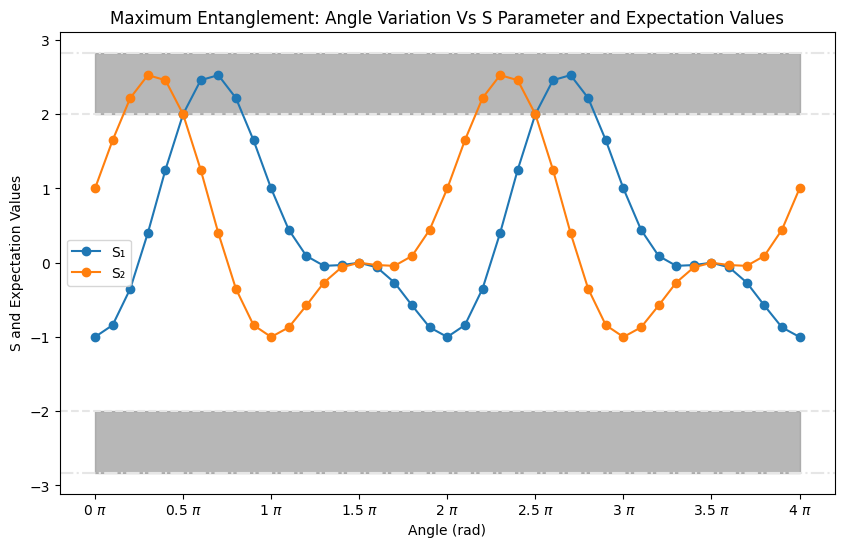

In [21]:
from sympy import symbols
fig, ax = plt.subplots(figsize=(10, 6))

# results from hardware
#ax.plot(phases / np.pi, ab, "o-", label="A B", zorder=3)
#ax.plot(phases / np.pi, minus_aB, "o-", label="-A B'", zorder=3)
#ax.plot(phases / np.pi, Ab, "o-", label="A' B", zorder=3)
#ax.plot(phases / np.pi, AB, "o-", label="A' B'", zorder=3)
ax.plot(phases / np.pi, S_1, "o-", label="S₁", zorder=3)


#ax.plot(phases / np.pi, aB, "o-", label="A B'", zorder=3)
#ax.plot(phases / np.pi, minus_Ab, "o-", label="-A' B", zorder=3)

ax.plot(phases / np.pi, S_2, "o-", label="S₂", zorder=3)

# classical bound +-2
ax.axhline(y=2, color="0.9", linestyle="--")
ax.axhline(y=-2, color="0.9", linestyle="--")

# quantum bound, +-2√2
ax.axhline(y=np.sqrt(2) * 2, color="0.9", linestyle="-.")
ax.axhline(y=-np.sqrt(2) * 2, color="0.9", linestyle="-.")
ax.fill_between(phases / np.pi, 2, 2 * np.sqrt(2), color="0.6", alpha=0.7)
ax.fill_between(phases / np.pi, -2, -2 * np.sqrt(2), color="0.6", alpha=0.7)

# set x tick labels to the unit of pi
ax.xaxis.set_major_formatter(tck.FormatStrFormatter("%g $\\pi$"))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1/2))

# set labels, and legend
plt.title("Maximum Entanglement: Angle Variation Vs S Parameter and Expectation Values")
plt.xlabel("Angle (rad)")
plt.ylabel("S and Expectation Values")
plt.legend()
plt.show()

In [22]:
print(chsh_isa_circuit)

     ┌───┐                  
q_0: ┤ H ├────────■─────────
     └───┘┌───────┴────────┐
q_1: ─────┤ Ry(2*$\theta$) ├
          └────────────────┘
